In [13]:
## Imports
import pandas as pd
import lightgbm as lgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import os
current_directory = os.getcwd()
print(current_directory)
import shap
shap.initjs()

/Users/ssachd/Library/CloudStorage/OneDrive-Personal/LighGB ML/Model


In [14]:
##Input
file_name = 'Mean_RockSiteInjection.xlsx'
sheet_name='Mean_Rock'
## Model Parameters
Label_1= 'Project_Type'
Label_2= 'Rock_Name'
label = ['Rock','Injection','All']

label_train = 'Injection'


obj_param = 'Moment_Max'
cat_feat= Label_1


data_read = pd.read_excel(f"CSVs/ML_Inputs/{file_name}",sheet_name=sheet_name)
cols = data_read.columns.tolist()
cols = [col for col in cols if col not in [cat_feat]]

if label_train == 'Rock':
    drop_cols = ['Injected Volume','Injected Depth ','Injected Rate','Rock_Name',obj_param]
if label_train == 'Injection':
    drop_cols = [col for col in cols if col not in ['Injected Volume', 'Injected Depth', 'Injected Rate']]
if label_train == 'All':
    drop_cols = ['Project_Type','Rock_Name',obj_param,"Young's Modulus",'Rock Density','Thermal Conductivity','Thermal Expansion Coefficient']


print(drop_cols)
print(cat_feat)
print(obj_param)
LR = 0.85
MD = 10


## FIG 1_ Validation Plor
title_1 = f'Validation Plot_{label_train}_{LR}'
title_2 = f'Bar Plot_{label_train}_{cat_feat}_{LR}'
title_3 = f'validation Plot_{label_train}_{cat_feat}_{LR}'
title_4 = f'Bar Plot_{label_train}_{cat_feat}_{LR}'



['Rock_Name', 'Rock Density', 'Rock Porosity ', 'Rock Permeability ', "Young's Modulus", "Poisson's Ratio", 'Bulk Modulus', 'Shear Modulus', 'UCS', 'Thermal Conductivity', 'Thermal Expansion Coefficient', 'Biot Coefficient', 'Injected Depth ', 'WellHead Pressure', 'Sv_Overburden Stress', 'Sh_Horizontal Stress', 'Pore Pressure', 'Moment_Max']
Project_Type
Moment_Max


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np

# Keep rows with Inj_Vol > 1 and reset index
data = data_read
# data = data_read[data_read['Inj_Vol'] > 1].copy()
# data.reset_index(drop=True, inplace=True)
print("Full Data Shape:", data.shape)

# Convert categorical features
data[cat_feat] = data[cat_feat].astype('category')

# Prepare features and target
X = data.drop(columns=drop_cols)
print(X.columns)
X_ft = X.columns.tolist()
Y = data[obj_param]

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 51,
    'learning_rate': 0.45,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.1,
    'lambda_l2': 0.2,
    'min_gain_to_split': 0.01,
    'verbosity': -1,
    'seed': 84,
    'max_depth': 5
}

# Iterate over random states and find the best one
best_rmse = float('inf')
best_r2 = None
best_random_state = None
best_model = None

for random_state in range(1500):  # Iterate over random states from 0 to 1499
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.10, random_state=random_state
    )

    # LightGBM dataset
    train_data = lgb.Dataset(X_train, label=Y_train, feature_name=X_ft)
    
    # Train the model
    model = lgb.train(params, train_data, num_boost_round=100)
    
    # Predict and calculate RMSE and R²
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
    r2 = r2_score(Y_test, y_pred)
    
    print(f'Random State {random_state} - RMSE: {rmse:.4f}, R²: {r2:.4f}')
    
    # Update the best model if the current RMSE is lower
    if rmse < best_rmse:
        best_rmse = rmse
        best_r2 = r2
        best_random_state = random_state
        best_model = model

# Final best state
print(f'\nBest Random State: {best_random_state} with RMSE: {best_rmse:.4f} and R²: {best_r2:.4f}')


Full Data Shape: (158, 21)
Index(['Project_Type', 'Injected Rate', 'Injected Volume'], dtype='object')
Random State 0 - RMSE: 1.3683, R²: 0.7296
Random State 1 - RMSE: 1.6359, R²: -0.3930
Random State 2 - RMSE: 1.5513, R²: 0.7527
Random State 3 - RMSE: 1.8110, R²: 0.2266
Random State 4 - RMSE: 1.4446, R²: 0.7116
Random State 5 - RMSE: 2.2971, R²: 0.3894
Random State 6 - RMSE: 2.1616, R²: 0.2777
Random State 7 - RMSE: 1.8276, R²: 0.1053
Random State 8 - RMSE: 2.0500, R²: -0.3259
Random State 9 - RMSE: 2.1418, R²: 0.2915
Random State 10 - RMSE: 1.4288, R²: 0.5308
Random State 11 - RMSE: 1.5167, R²: 0.6515
Random State 12 - RMSE: 1.7631, R²: 0.2969
Random State 13 - RMSE: 1.7579, R²: 0.2988
Random State 14 - RMSE: 1.7486, R²: 0.6014
Random State 15 - RMSE: 1.6316, R²: -0.0364
Random State 16 - RMSE: 1.5162, R²: 0.4661
Random State 17 - RMSE: 2.2215, R²: 0.4150
Random State 18 - RMSE: 2.2344, R²: -0.4603
Random State 19 - RMSE: 1.6801, R²: -0.9373
Random State 20 - RMSE: 1.6504, R²: 0.4505

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split again using the best random state
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.10, random_state=765
)

# LightGBM dataset with categorical features
train_data = lgb.Dataset(
    X_train,
    label=Y_train,
    feature_name=X_ft,
    categorical_feature=cat_feat
)

# Train the final model
final_model = lgb.train(params, train_data, num_boost_round=100)

# Predict on test set
y_pred = final_model.predict(X_test, num_iteration=final_model.best_iteration)

# Calculate final RMSE and R²
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

print(f'Final Model RMSE: {rmse:.4f}')
print(f'Final Model R²: {r2:.4f}')

# Save the final model
final_model.save_model('model.txt')
print(f'Model saved as "model.txt" with RMSE: {rmse:.4f} and R²: {r2:.4f}')


Final Model RMSE: 1.0520
Final Model R²: 0.5204
Model saved as "model.txt" with RMSE: 1.0520 and R²: 0.5204


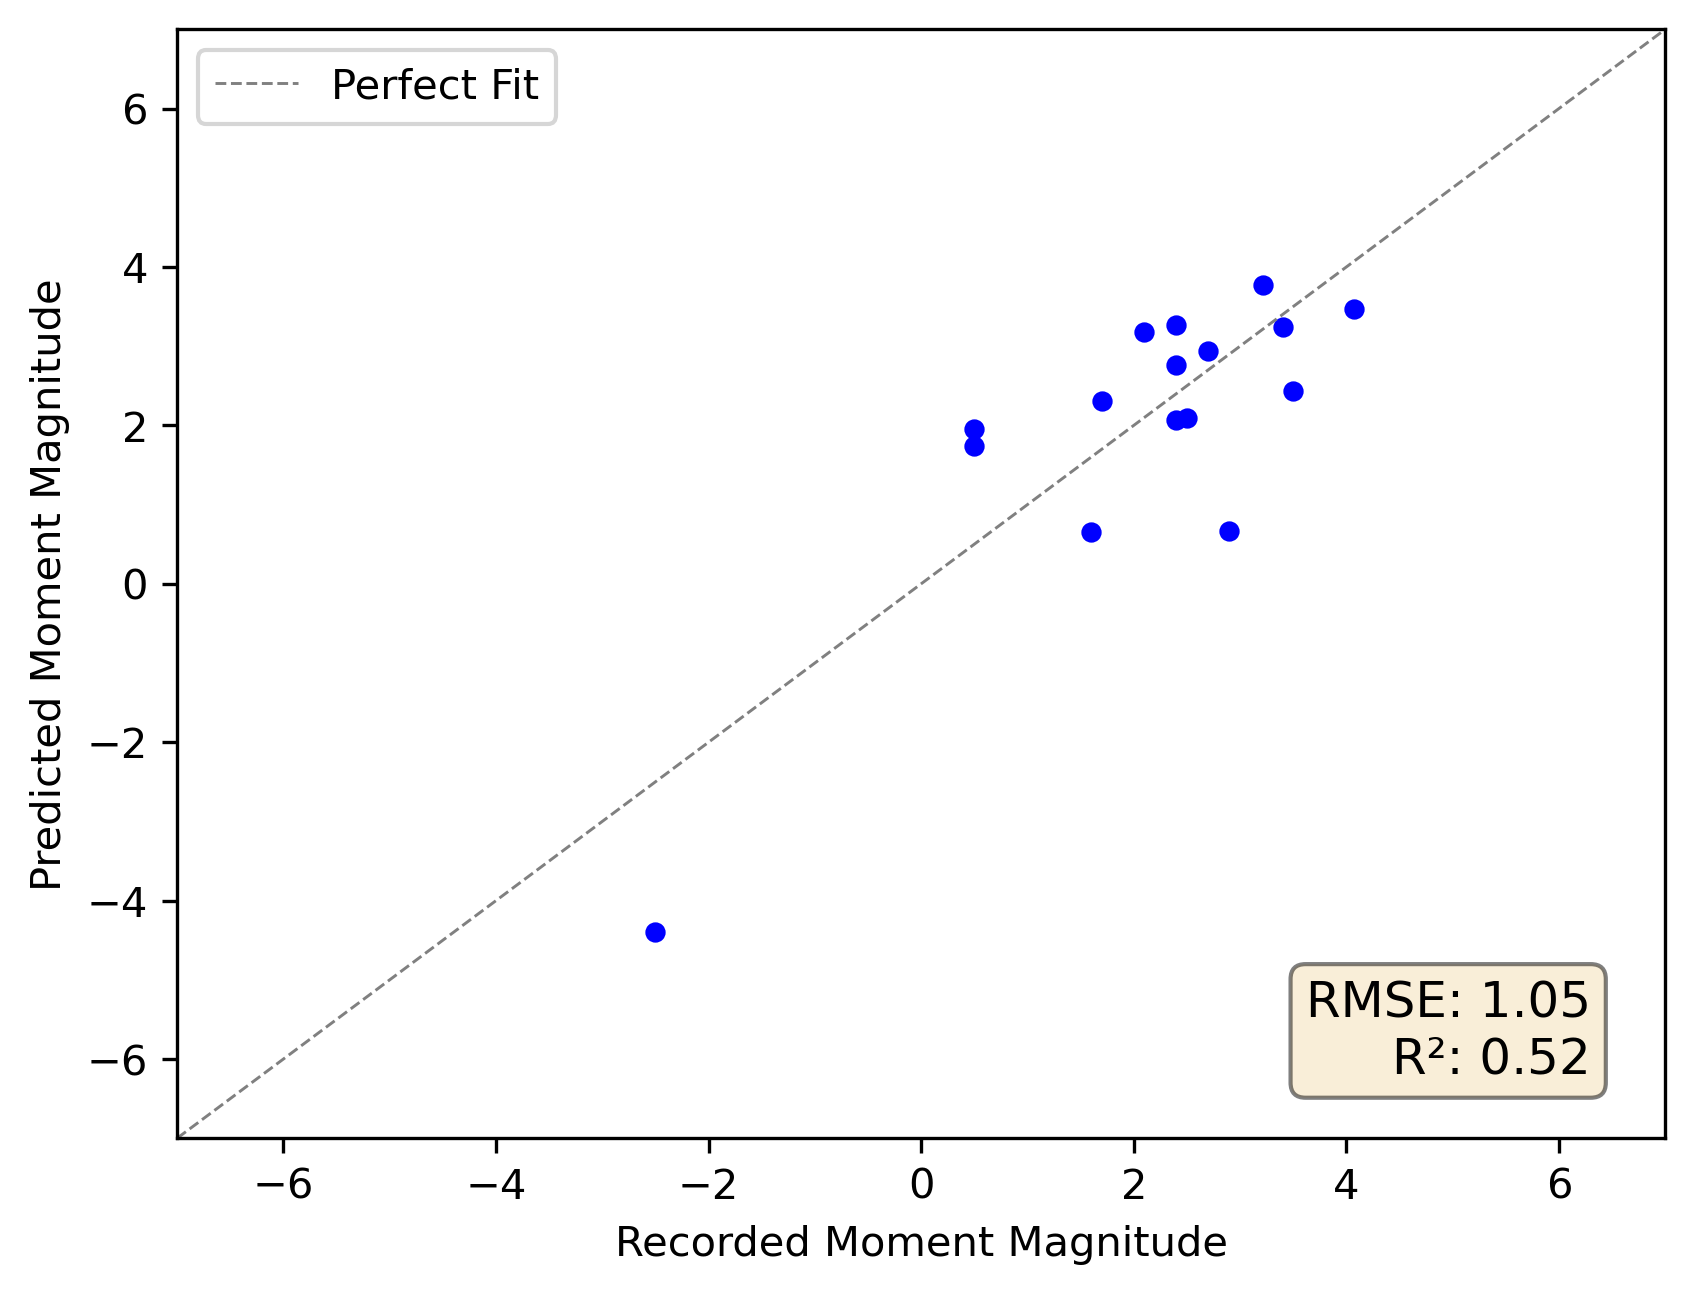

In [17]:
import matplotlib.pyplot as plt

plt.figure(dpi=300)

# Scatter plot
plt.scatter(Y_test, y_pred, color='blue', s=15, zorder=2)

# Fitted line
plt.plot(
    [-7, 7],
    [-7, 7],
    color='gray',
    linestyle='--',
    linewidth=0.7,
    label='Perfect Fit'
)

# RMSE and R² annotation
textstr = f'RMSE: {rmse:.2f}\nR²: {r2:.2f}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(
    0.95, 0.05, textstr,
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=props
)

plt.xlabel('Recorded Moment Magnitude')
plt.ylabel('Predicted Moment Magnitude')
plt.ylim(-7, 7)
plt.xlim(-7, 7)
plt.legend()

# Save figure
file_path = "PNGs/06_04/a.jpg"
plt.savefig(file_path, format='jpg')
plt.show()


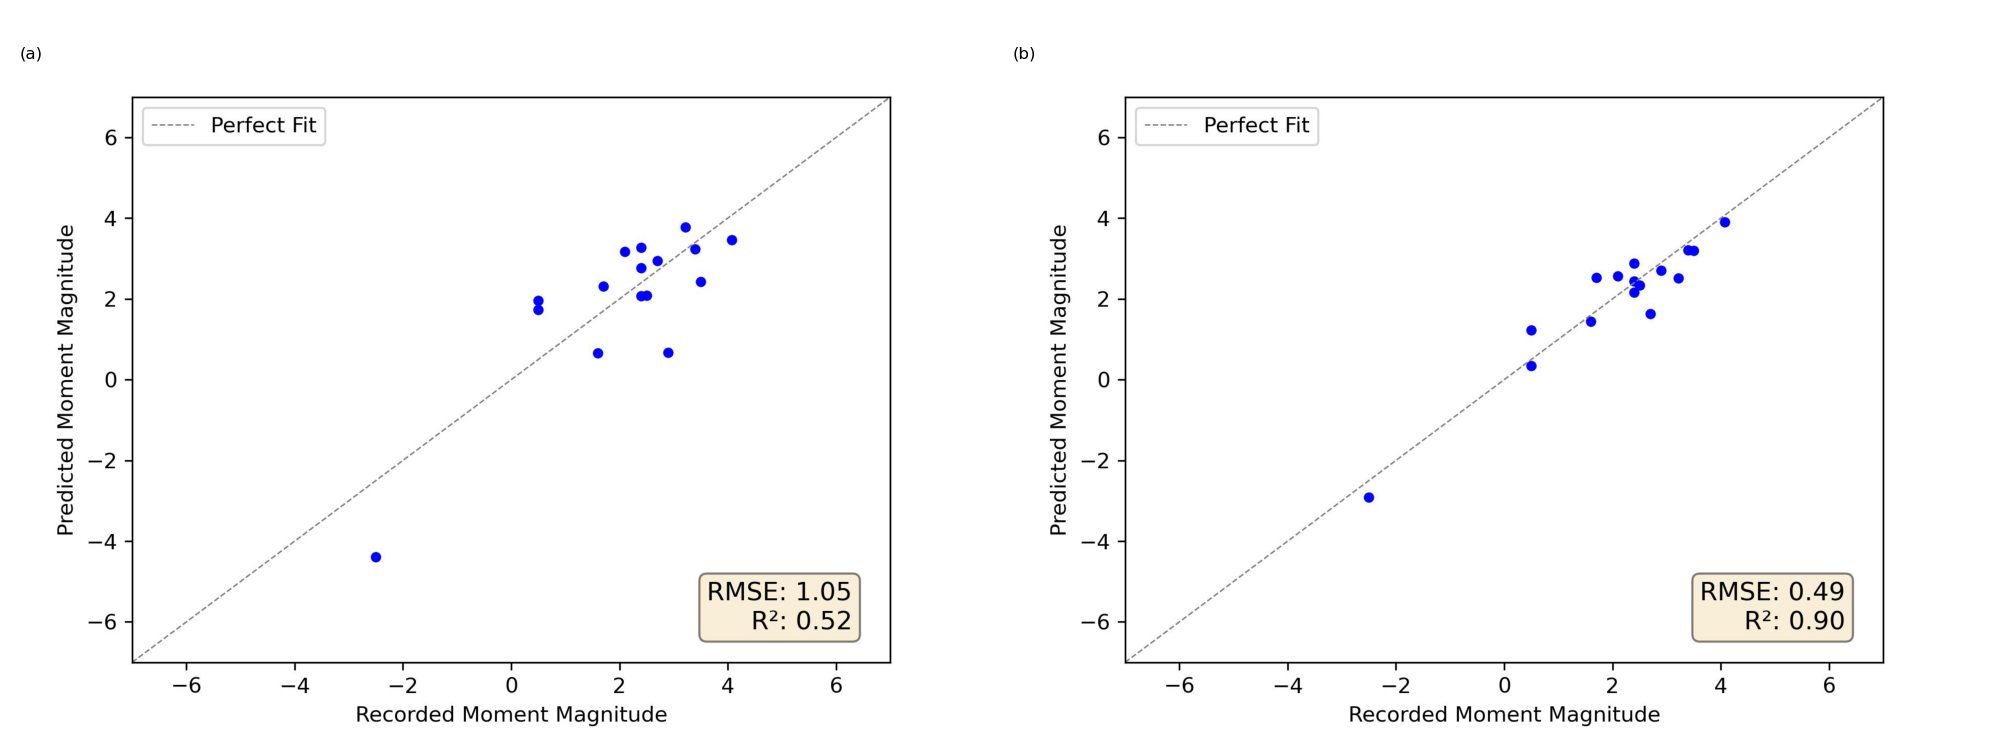

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

# File paths for the images
file_path_a = f"PNGs/06_04/a.jpg"
file_path_b = f"PNGs/06_04/b.jpg"

# Load the images
img_a = Image.open(file_path_a)
img_b = Image.open(file_path_b)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2,figsize=(20,10))

# Plot the first image
axes[0].imshow(img_a)
axes[0].axis('off')  # Turn off axes
axes[0].text(0.01, 0.95, '(a)', transform=axes[0].transAxes, fontsize=12, va='top', ha='left')

# Plot the second image
axes[1].imshow(img_b)
axes[1].axis('off')  # Turn off axes
axes[1].text(0.01, 0.95, '(b)', transform=axes[1].transAxes, fontsize=12, va='top', ha='left')
plt.subplots_adjust(left=0.1, right=0.99,wspace=0.01)
# Adjust layout and show the plot
plt.tight_layout()
file_path = f"PNGs/06_04/c1.jpg"
plt.savefig(file_path, format='jpg')
plt.show()
